<a href="https://colab.research.google.com/github/AnshumanMohapatra11121999/9P34P-CipherSchools/blob/main/Capstone_Project_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import SVC, OneClassSVM
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
from time import perf_counter

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/content/augmented_dataset30k.csv')

In [7]:
print(data.shape)
print(data.dtypes)
print(data.info())

(30000, 38)
Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  objec

In [8]:
#To drop/remove specific columns in the dataset
data = data.drop(['Customer ID', 'City', 'Zip Code', 'Churn Category', 'Churn Reason'], axis=1)

In [9]:
#To check whether there is any duplicate values in the row or not
data.duplicated().sum()

22957

In [10]:
#.select_dtypes(exclude='number'): This is a method provided by Pandas for selecting columns based on their data types.
#The exclude parameter specifies the data types to exclude from the selection. In this case, 'number'
df1 = data.select_dtypes(exclude='number')

In [11]:

'''The code df1.describe().T computes summary statistics for each column in the DataFrame df1 and then transposes the result,
displaying the statistics for each column as rows instead of columns. Let's break down what each part of the code does:

df1: This refers to the Pandas DataFrame df1,
which contains a subset of columns from the original dataset data.
As per the previous explanation, df1 likely contains columns with non-numeric data types,
as it was obtained using data.select_dtypes(exclude='number').

.describe(): This is a method provided by Pandas that computes summary statistics for each column in the DataFrame.
By default, it calculates statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for numerical columns.
For non-numeric columns, it provides statistics such as count, unique, top (most frequently occurring value), and frequency (count of the top value).

.T: This is a method that transposes the DataFrame,
swapping the rows and columns. After transposing, the statistics for each column are displayed as rows instead of columns.

Putting it all together, df1.describe().T calculates summary statistics for each column in the DataFrame df1 and presents the statistics in a transposed format,
making it easier to view the statistics for each column vertically. This can be useful for quickly examining the distribution and characteristics of non-numeric data in the dataset.'''

df1.describe().T


,count,unique,top,freq
Gender,30000,2,Male,15312
Married,30000,2,No,15530
Offer,30000,6,None,16599
Phone Service,30000,2,Yes,27098
Multiple Lines,27098,2,No,14390
Internet Service,30000,2,Yes,23567
Internet Type,23567,3,Fiber Optic,13005
Online Security,23567,2,No,14969
Online Backup,23567,2,No,13240
Device Protection Plan,23567,2,No,13322


In [12]:
'''Setting up the grid of subplots:

num_rows = 5 and num_cols = 4: These variables specify the number of rows and columns in the grid of subplots.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20)): This line creates a grid of subplots with the specified number of rows and columns. The fig variable represents the entire figure, and axes is a 2D array of Axes objects representing the individual subplots. The figsize parameter sets the size of the entire figure.
Iterating over columns and plotting pie charts:

for i, column in enumerate(df1.columns):: This loop iterates over each column in the DataFrame df1.
categories = df1[column].value_counts(): This line computes the frequency of each unique value in the current column and stores it in the categories variable.
Inside the loop, a pie chart is plotted for each column:
ax = axes[i // num_cols, i % num_cols]: This line selects the current subplot from the grid of subplots.
ax.pie(categories, labels=categories.index, autopct='%1.1f%%', shadow=True, startangle=140): This line plots the pie chart with the frequencies of each unique value in the current column. Labels for each slice are set to the unique values, and percentages are displayed using the specified format.
ax.axis('equal'): This line ensures that the pie chart is circular.
ax.set_title(f'Distribution of {column}'): This sets the title of the subplot to indicate the distribution of values in the current column.
Adding annotations:

Text annotations are added to each subplot to display the total count and individual counts for each category.
total = categories.values.sum() computes the total count of values in the current column.
For each category, a text annotation is added below the pie chart to display the count and category label.
Displaying the plot:

plt.tight_layout() adjusts the layout of the subplots to prevent overlap.
plt.show() displays the plot on the screen.
Overall, this code generates a visual summary of the distribution of categorical variables in the DataFrame df1 using pie charts. Each pie chart represents the distribution of values in a single column of the DataFrame.'''

"Setting up the grid of subplots:\n\nnum_rows = 5 and num_cols = 4: These variables specify the number of rows and columns in the grid of subplots.\nfig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20)): This line creates a grid of subplots with the specified number of rows and columns. The fig variable represents the entire figure, and axes is a 2D array of Axes objects representing the individual subplots. The figsize parameter sets the size of the entire figure.\nIterating over columns and plotting pie charts:\n\nfor i, column in enumerate(df1.columns):: This loop iterates over each column in the DataFrame df1.\ncategories = df1[column].value_counts(): This line computes the frequency of each unique value in the current column and stores it in the categories variable.\nInside the loop, a pie chart is plotted for each column:\nax = axes[i // num_cols, i % num_cols]: This line selects the current subplot from the grid of subplots.\nax.pie(categories, labels=categories.index, 

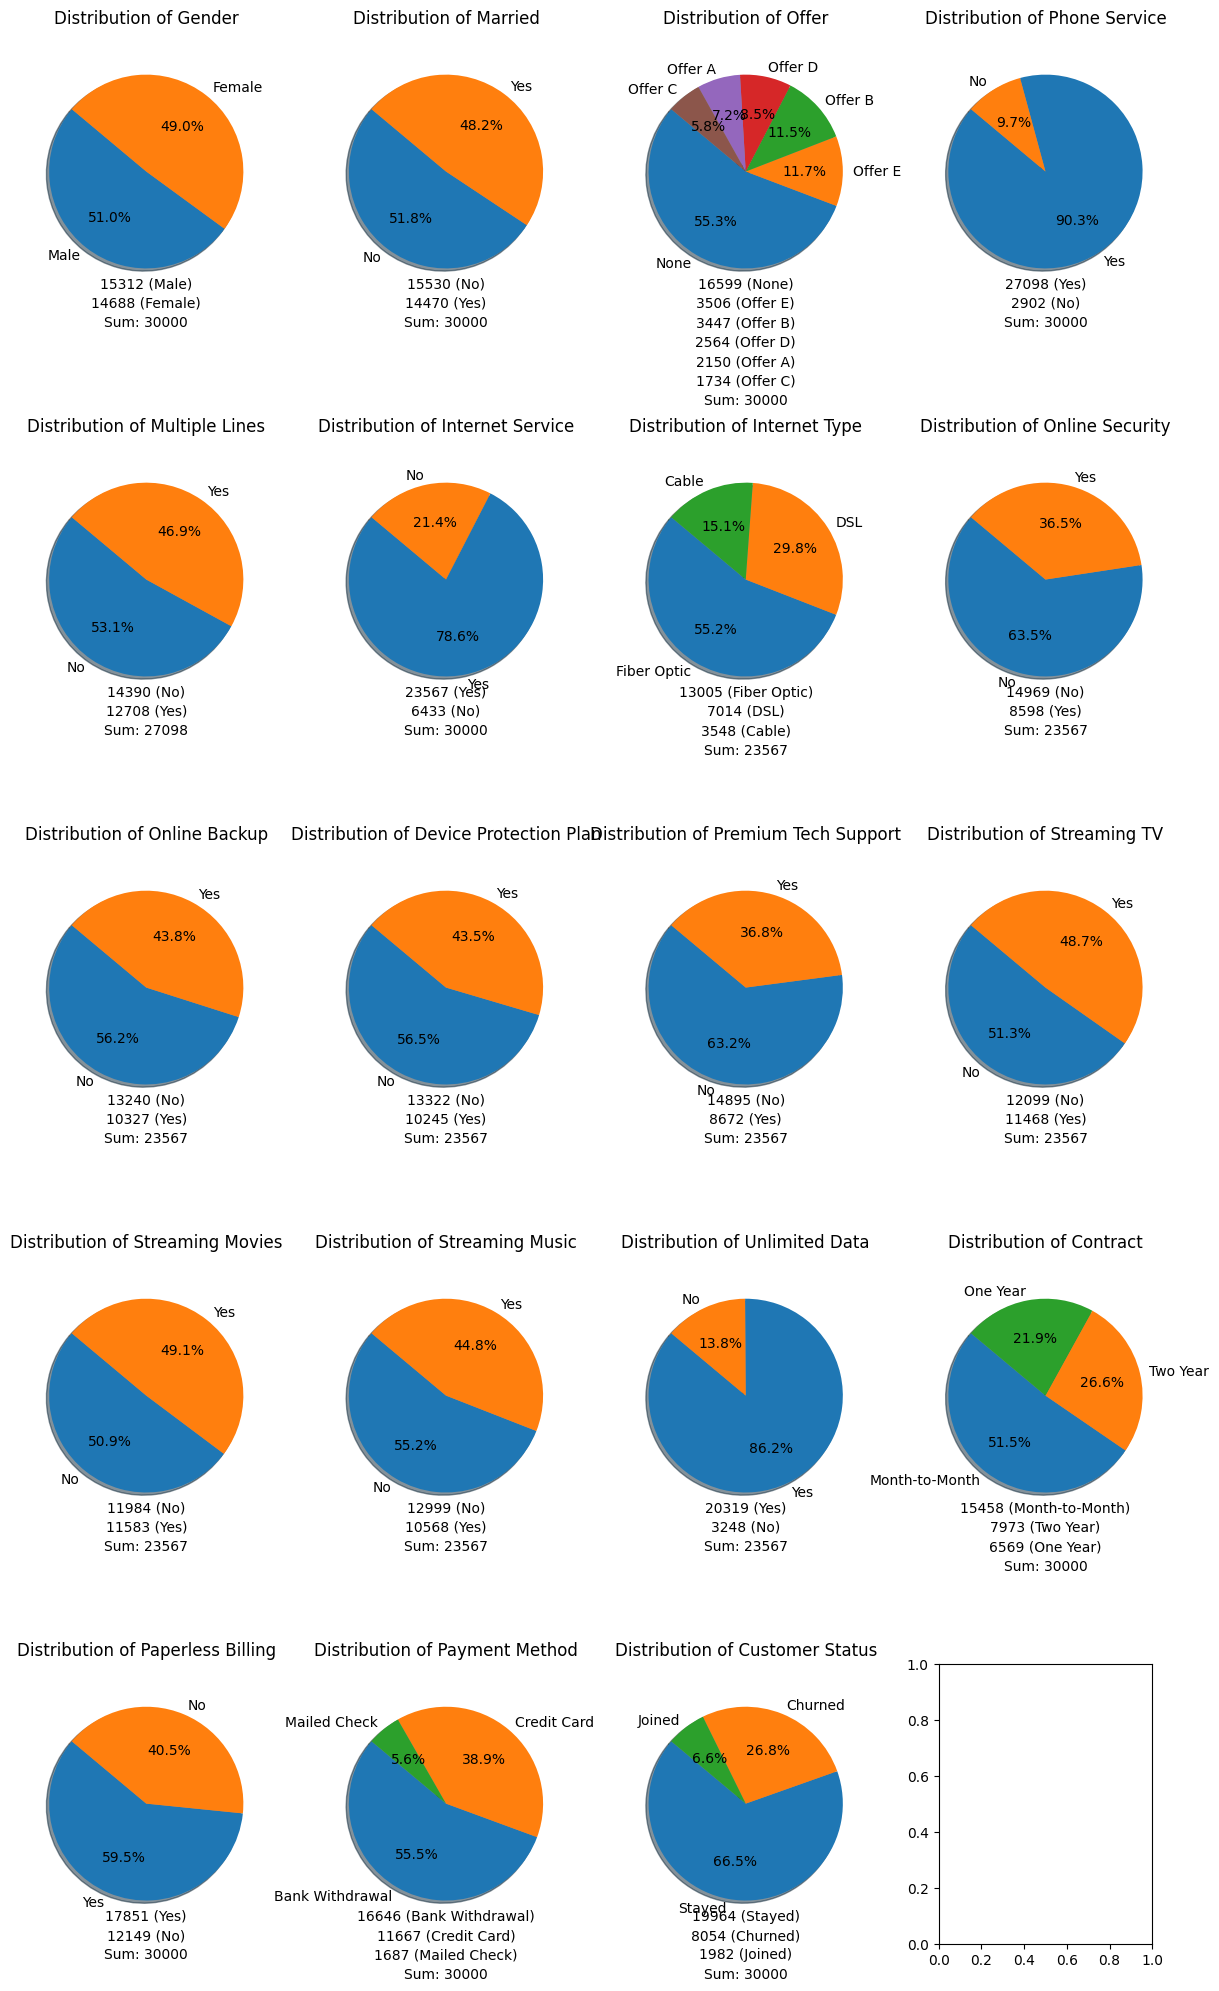

In [13]:
# Plotting the pie chart
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

for i, column in enumerate(df1.columns):
    categories = df1[column].value_counts()

    ax = axes[i // num_cols, i % num_cols]

    ax.pie(categories, labels=categories.index, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal')
    ax.set_title(f'Distribution of {column}')

    # Add text annotations for value count and sum
    total = categories.values.sum()
    sum_text = f'Sum: {total}'
    ax.text(0, -1.2 - len(categories)*0.2, sum_text, ha='center')

    for j, percentage in enumerate(categories):
        percent_text = f'{percentage} ({categories.index[j]})'
        ax.text(0, -1.2 - j*0.2, percent_text, ha='center')

plt.tight_layout()
plt.show()

In [14]:
'''This part of the code generates a matrix visualization of missing values in df1 using the msno library. Here's what it does:

msno.matrix(df1) creates a matrix plot where each row represents an observation (row) in the DataFrame, and each column represents a variable (column).
The plot displays a white or gray line for each variable, indicating the presence or absence of missing values. Rows with missing values are displayed as white lines, while rows with complete data are displayed as gray lines.'''

"This part of the code generates a matrix visualization of missing values in df1 using the msno library. Here's what it does:\n\nmsno.matrix(df1) creates a matrix plot where each row represents an observation (row) in the DataFrame, and each column represents a variable (column).\nThe plot displays a white or gray line for each variable, indicating the presence or absence of missing values. Rows with missing values are displayed as white lines, while rows with complete data are displayed as gray lines."

Null values in nominal features:
Gender                       0
Married                      0
Offer                        0
Phone Service                0
Multiple Lines            2902
Internet Service             0
Internet Type             6433
Online Security           6433
Online Backup             6433
Device Protection Plan    6433
Premium Tech Support      6433
Streaming TV              6433
Streaming Movies          6433
Streaming Music           6433
Unlimited Data            6433
Contract                     0
Paperless Billing            0
Payment Method               0
Customer Status              0
dtype: int64


<Axes: >

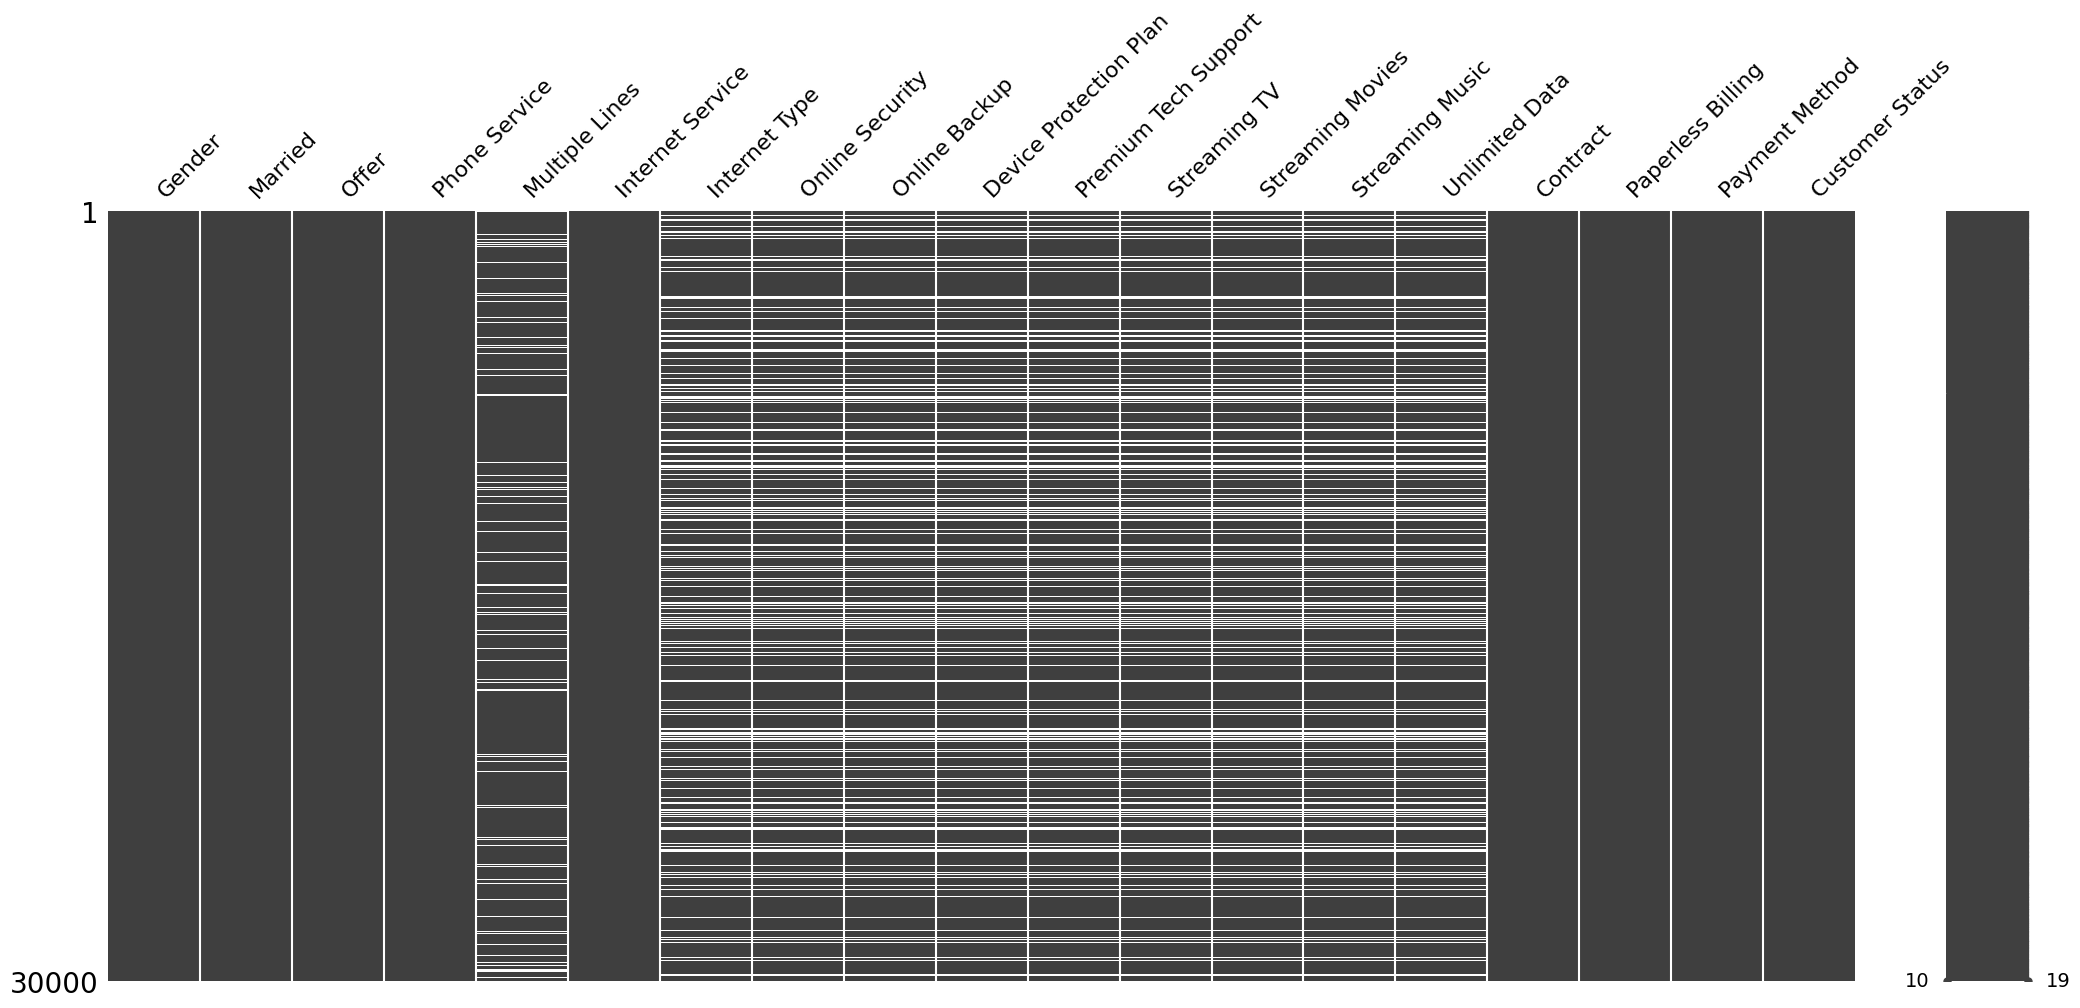

In [15]:
# Print null values summary
print("Null values in nominal features:")
print(df1.isna().sum())

# Visualize missing values
import missingno as msno
msno.matrix(df1)


In [16]:
'''Internet service shows indicates if the customer subscribes to Internet service with the company: Yes, No.

Sum of customer that subscribe internet services are 5517.

According above visualization, some features are dependent on internet service. In other words, these features can be activated when the customer subscribes to Internet service.

Internet Type
Online Security
Online Backup
Device Protection Plan
Premium Tech Support
Streaming TV
Streaming Movies
Streaming Music
Unlimited Data
According to the above results, we can see customers who don't subscribe to internet services, have null values in the mentioned features. Consequently, for cleaning these features, the null value of these columns should take "No" values.'''

'Internet service shows indicates if the customer subscribes to Internet service with the company: Yes, No.\n\nSum of customer that subscribe internet services are 5517.\n\nAccording above visualization, some features are dependent on internet service. In other words, these features can be activated when the customer subscribes to Internet service.\n\nInternet Type\nOnline Security\nOnline Backup\nDevice Protection Plan\nPremium Tech Support\nStreaming TV\nStreaming Movies\nStreaming Music\nUnlimited Data\nAccording to the above results, we can see customers who don\'t subscribe to internet services, have null values in the mentioned features. Consequently, for cleaning these features, the null value of these columns should take "No" values.'

In [17]:
#filling null values
df1['Internet Type'] = df1['Internet Type'].apply(lambda x: 'None' if pd.isnull(x) else x)

column_name = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
               'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
for column in column_name:
  df1[column] = df1[column].apply(lambda x: 'No' if pd.isnull(x) else x)

<Axes: >

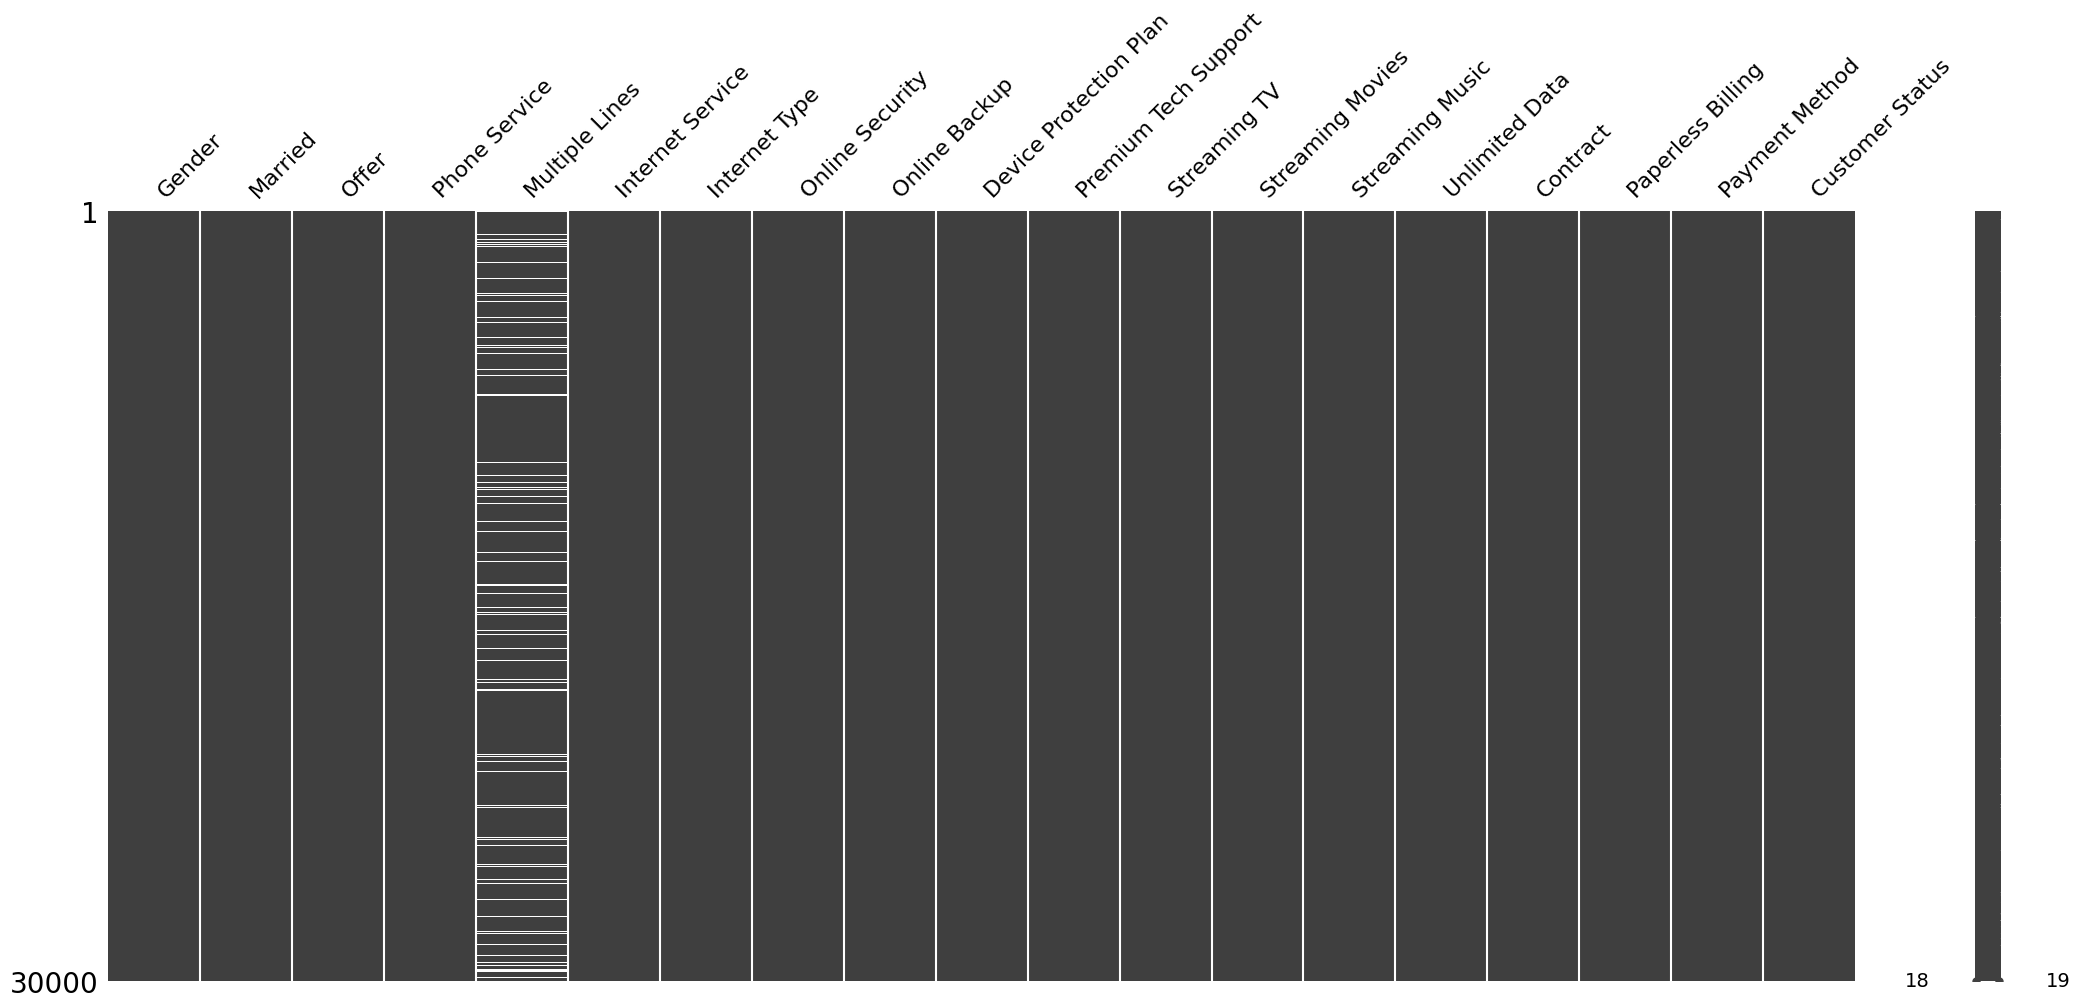

In [18]:
msno.matrix(df1)

In [19]:
#fill missing value in the Multiple Line feature by KNN imputer.

# before applying KNN imputer, the dataset should be labeled.

In [20]:
# first step:
conversion_dict = {"Yes": 1, "No": 0}
df1['Multiple Lines'] = df1['Multiple Lines'].map(conversion_dict)

# second step: labeling the target by using LabelEncoder
label_encoder = LabelEncoder()
df1['Customer Status'] = label_encoder.fit_transform(df1['Customer Status'])

# third step: using pd.get_dummies for other features
df1 = pd.get_dummies(df1, drop_first=True)

In [21]:
# the KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df1)
imputed_data = np.round(imputed_data)
# If we want to keep the DataFrame format:
df1_imputed = pd.DataFrame(data=imputed_data, columns=df1.columns)

0.0    16108
1.0    13892
Name: Multiple Lines, dtype: int64

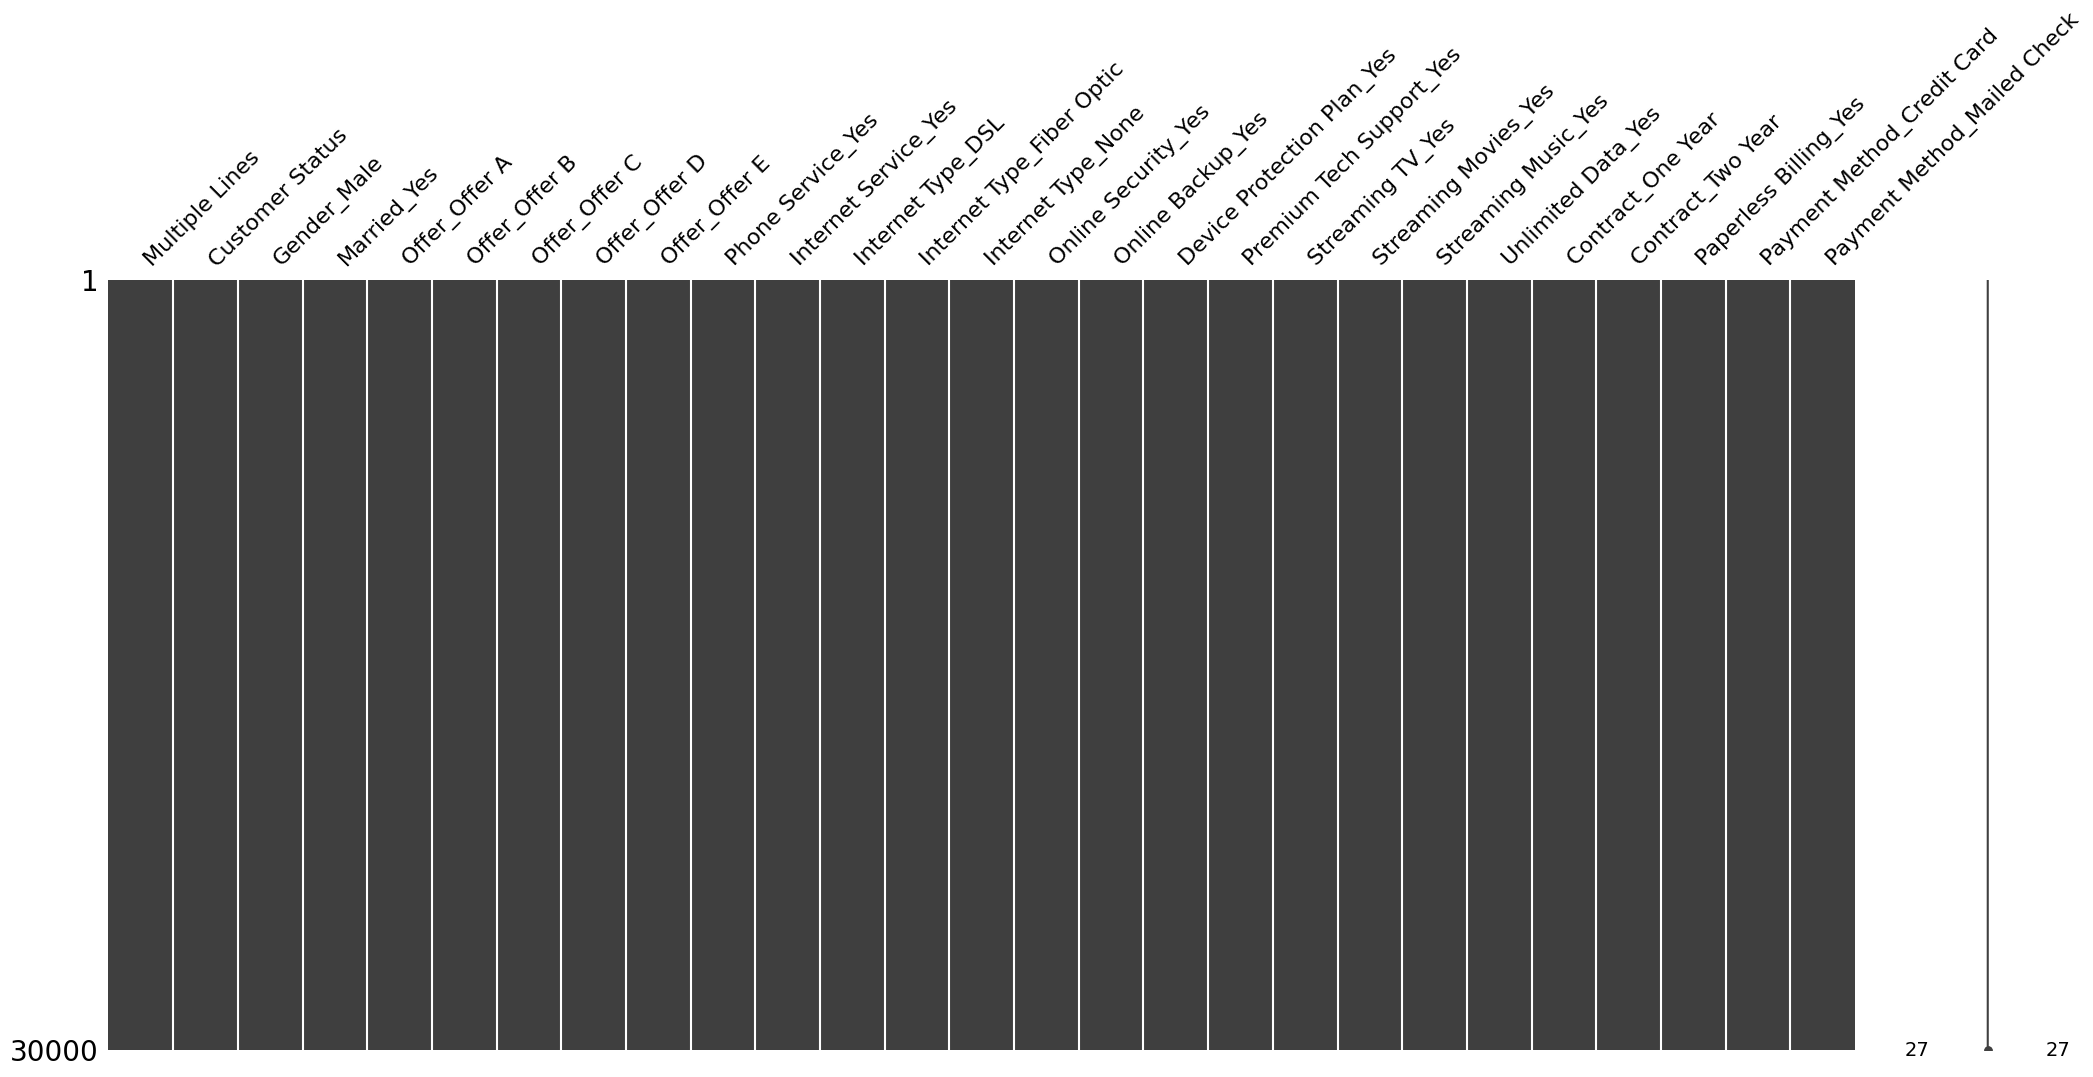

In [22]:
# checking missing value
msno.matrix(df1_imputed)
df1_imputed['Multiple Lines'].value_counts()

In [23]:
df2 = data.select_dtypes(include='number')

In [24]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30000.0,46.523067,16.814584,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,30000.0,0.465333,0.957686,0.000000,0.000000,0.000000,0.000000,9.000000
Latitude,30000.0,36.174428,2.465681,32.555828,33.988543,36.057458,38.148862,41.962127
Longitude,30000.0,-119.734252,2.150943,-124.301372,-121.777179,-119.505661,-117.955054,-114.192901
Number of Referrals,30000.0,1.941200,2.997361,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,30000.0,32.193733,24.543750,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,27098.0,25.360255,14.226542,1.010000,12.970000,25.540000,37.700000,49.990000
Avg Monthly GB Download,23567.0,26.354606,19.507295,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,30000.0,63.704895,31.137604,-10.000000,31.050000,70.100000,89.800000,118.750000
Total Charges,30000.0,2267.719841,2264.317006,18.800000,387.200000,1376.500000,3782.400000,8684.800000


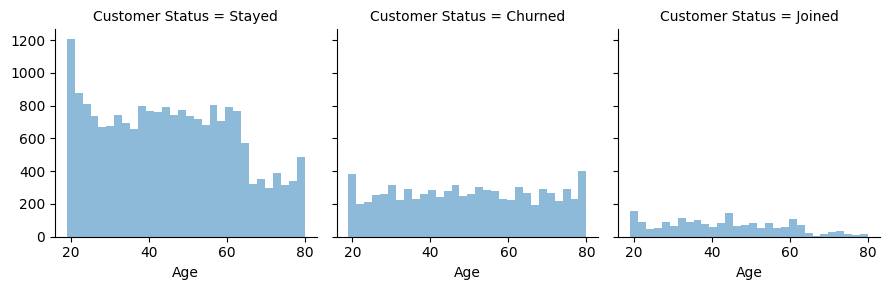

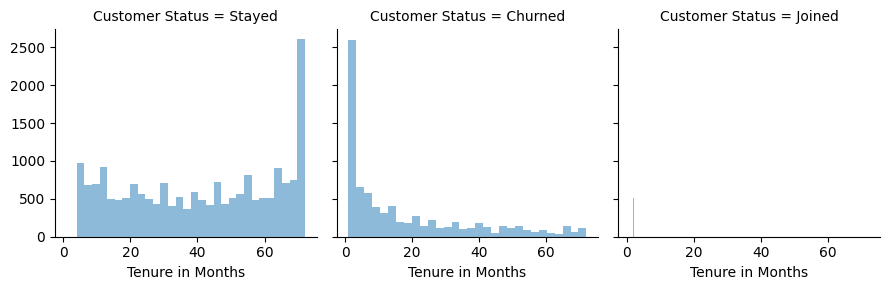

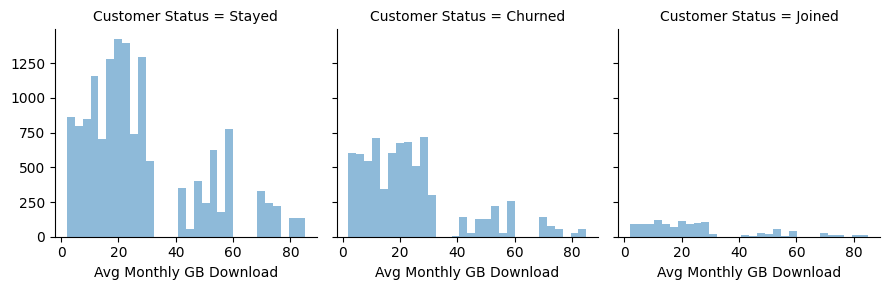

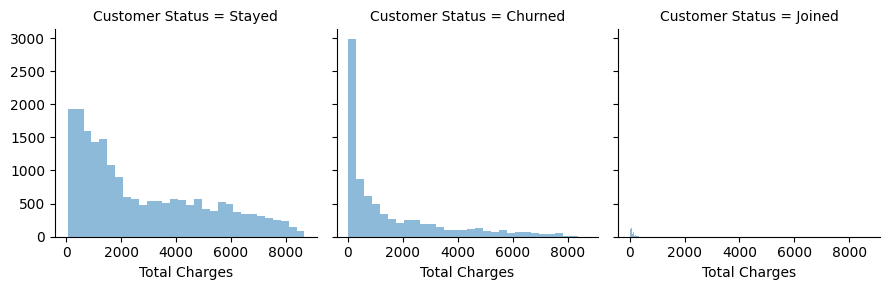

In [25]:
# Visualization
column_name = ['Age', 'Tenure in Months', 'Avg Monthly GB Download', 'Total Charges']
for column in column_name:
  v = sns.FacetGrid(data, col='Customer Status')
  v.map(plt.hist, column, alpha=0.5, bins=30)
  plt.show

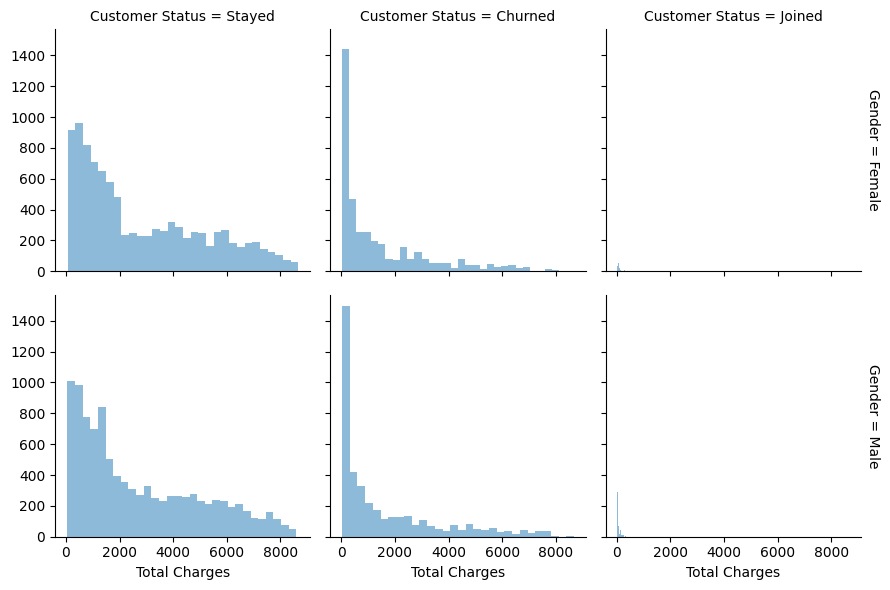

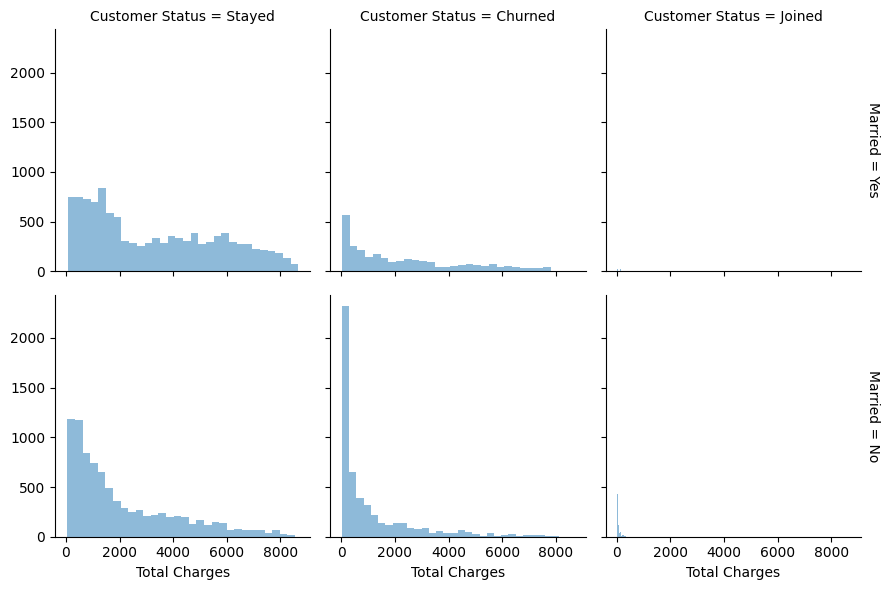

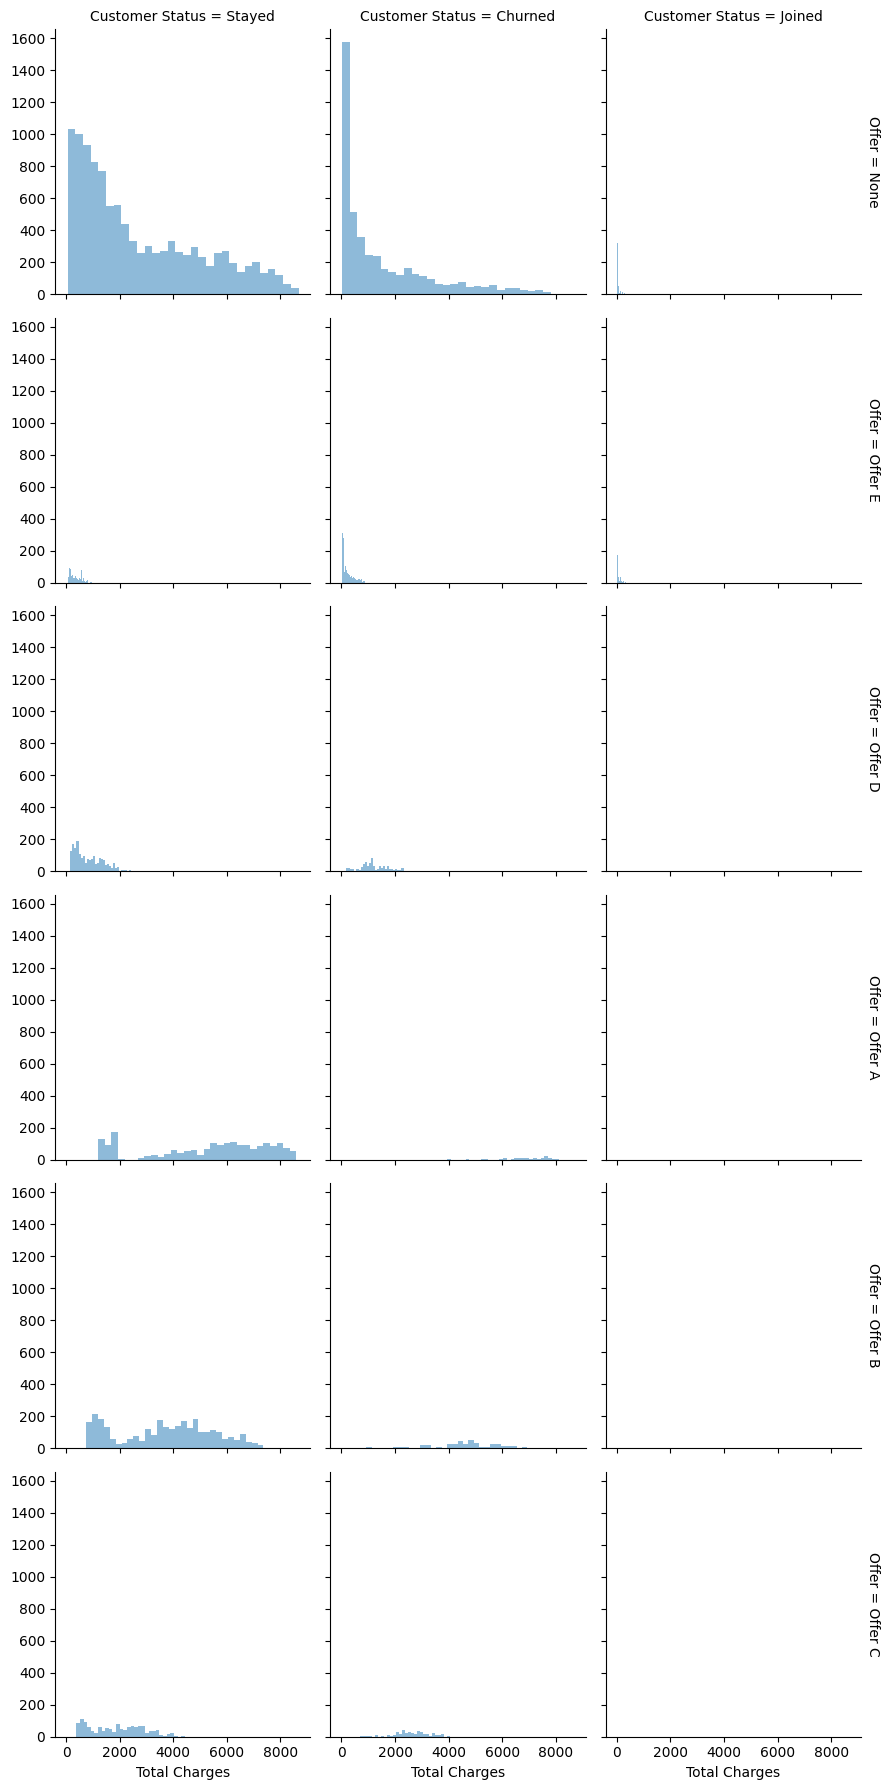

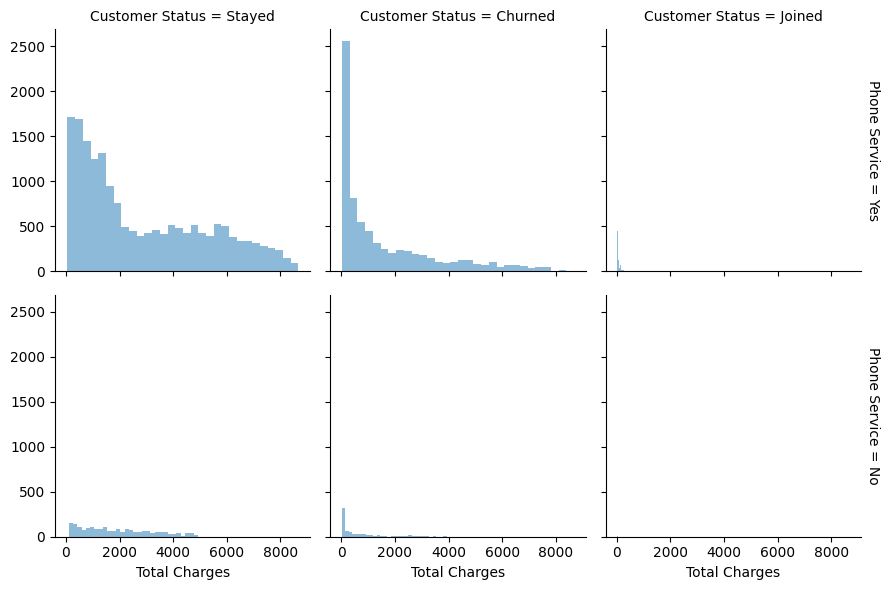

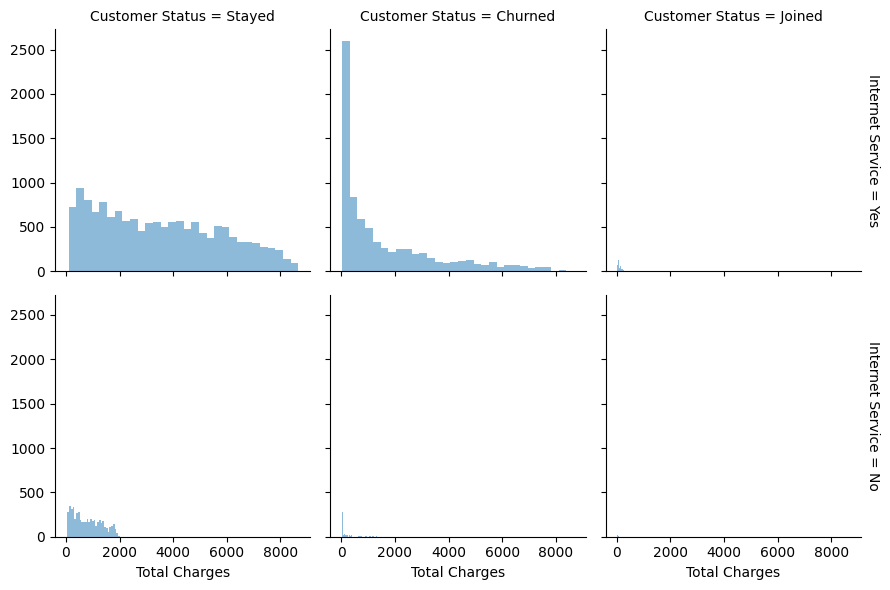

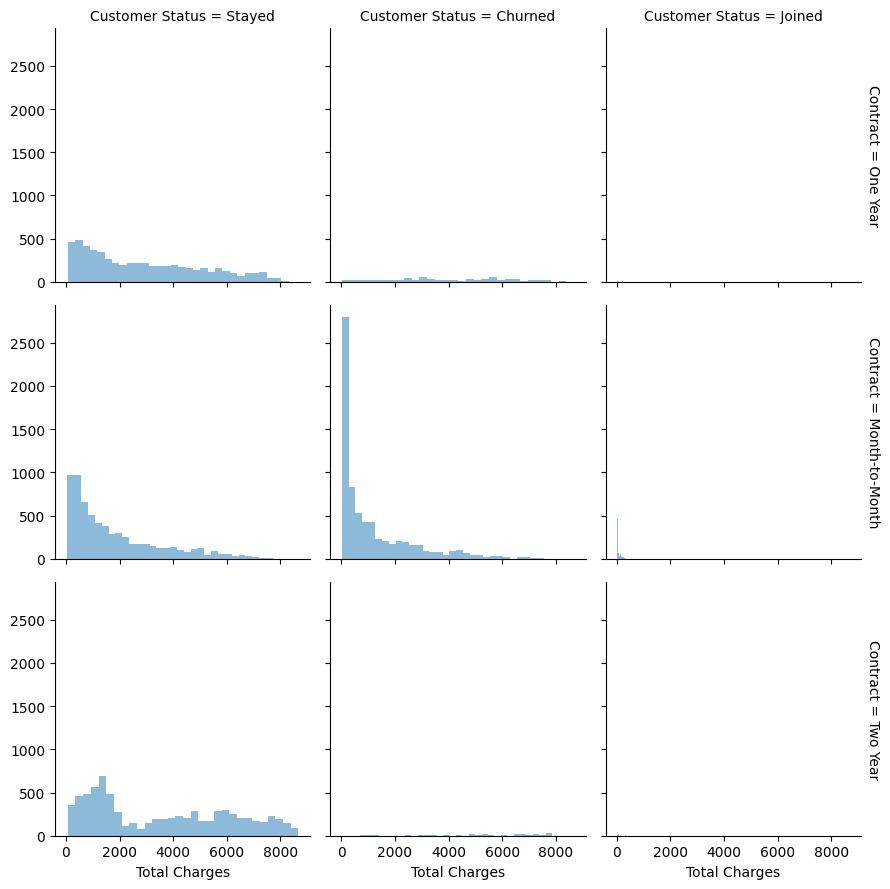

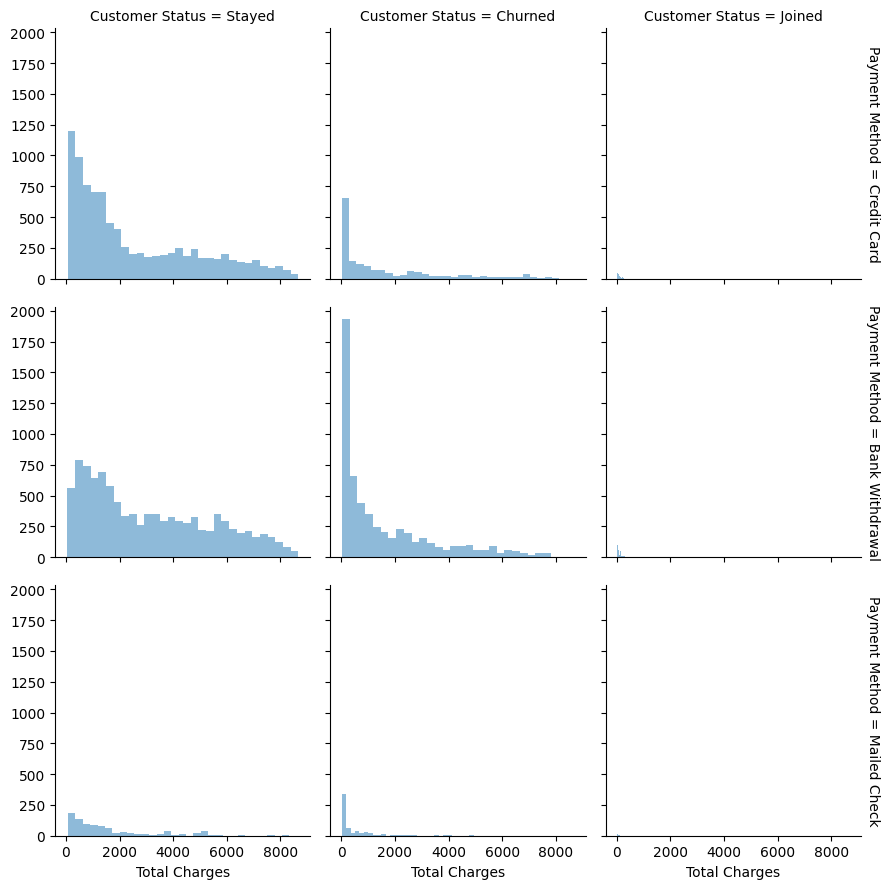

In [26]:
# visualization<Optional>

column_name = [
    #'Age',
    'Total Charges']
indices_name = ['Gender', 'Married', 'Offer', 'Phone Service', 'Internet Service', 'Contract', 'Payment Method']
for column in column_name:
    for k in indices_name:
      v = sns.FacetGrid(data, col='Customer Status', row=k, margin_titles=True)
      v.map(plt.hist, column, alpha=0.5, bins=30)
      plt.show


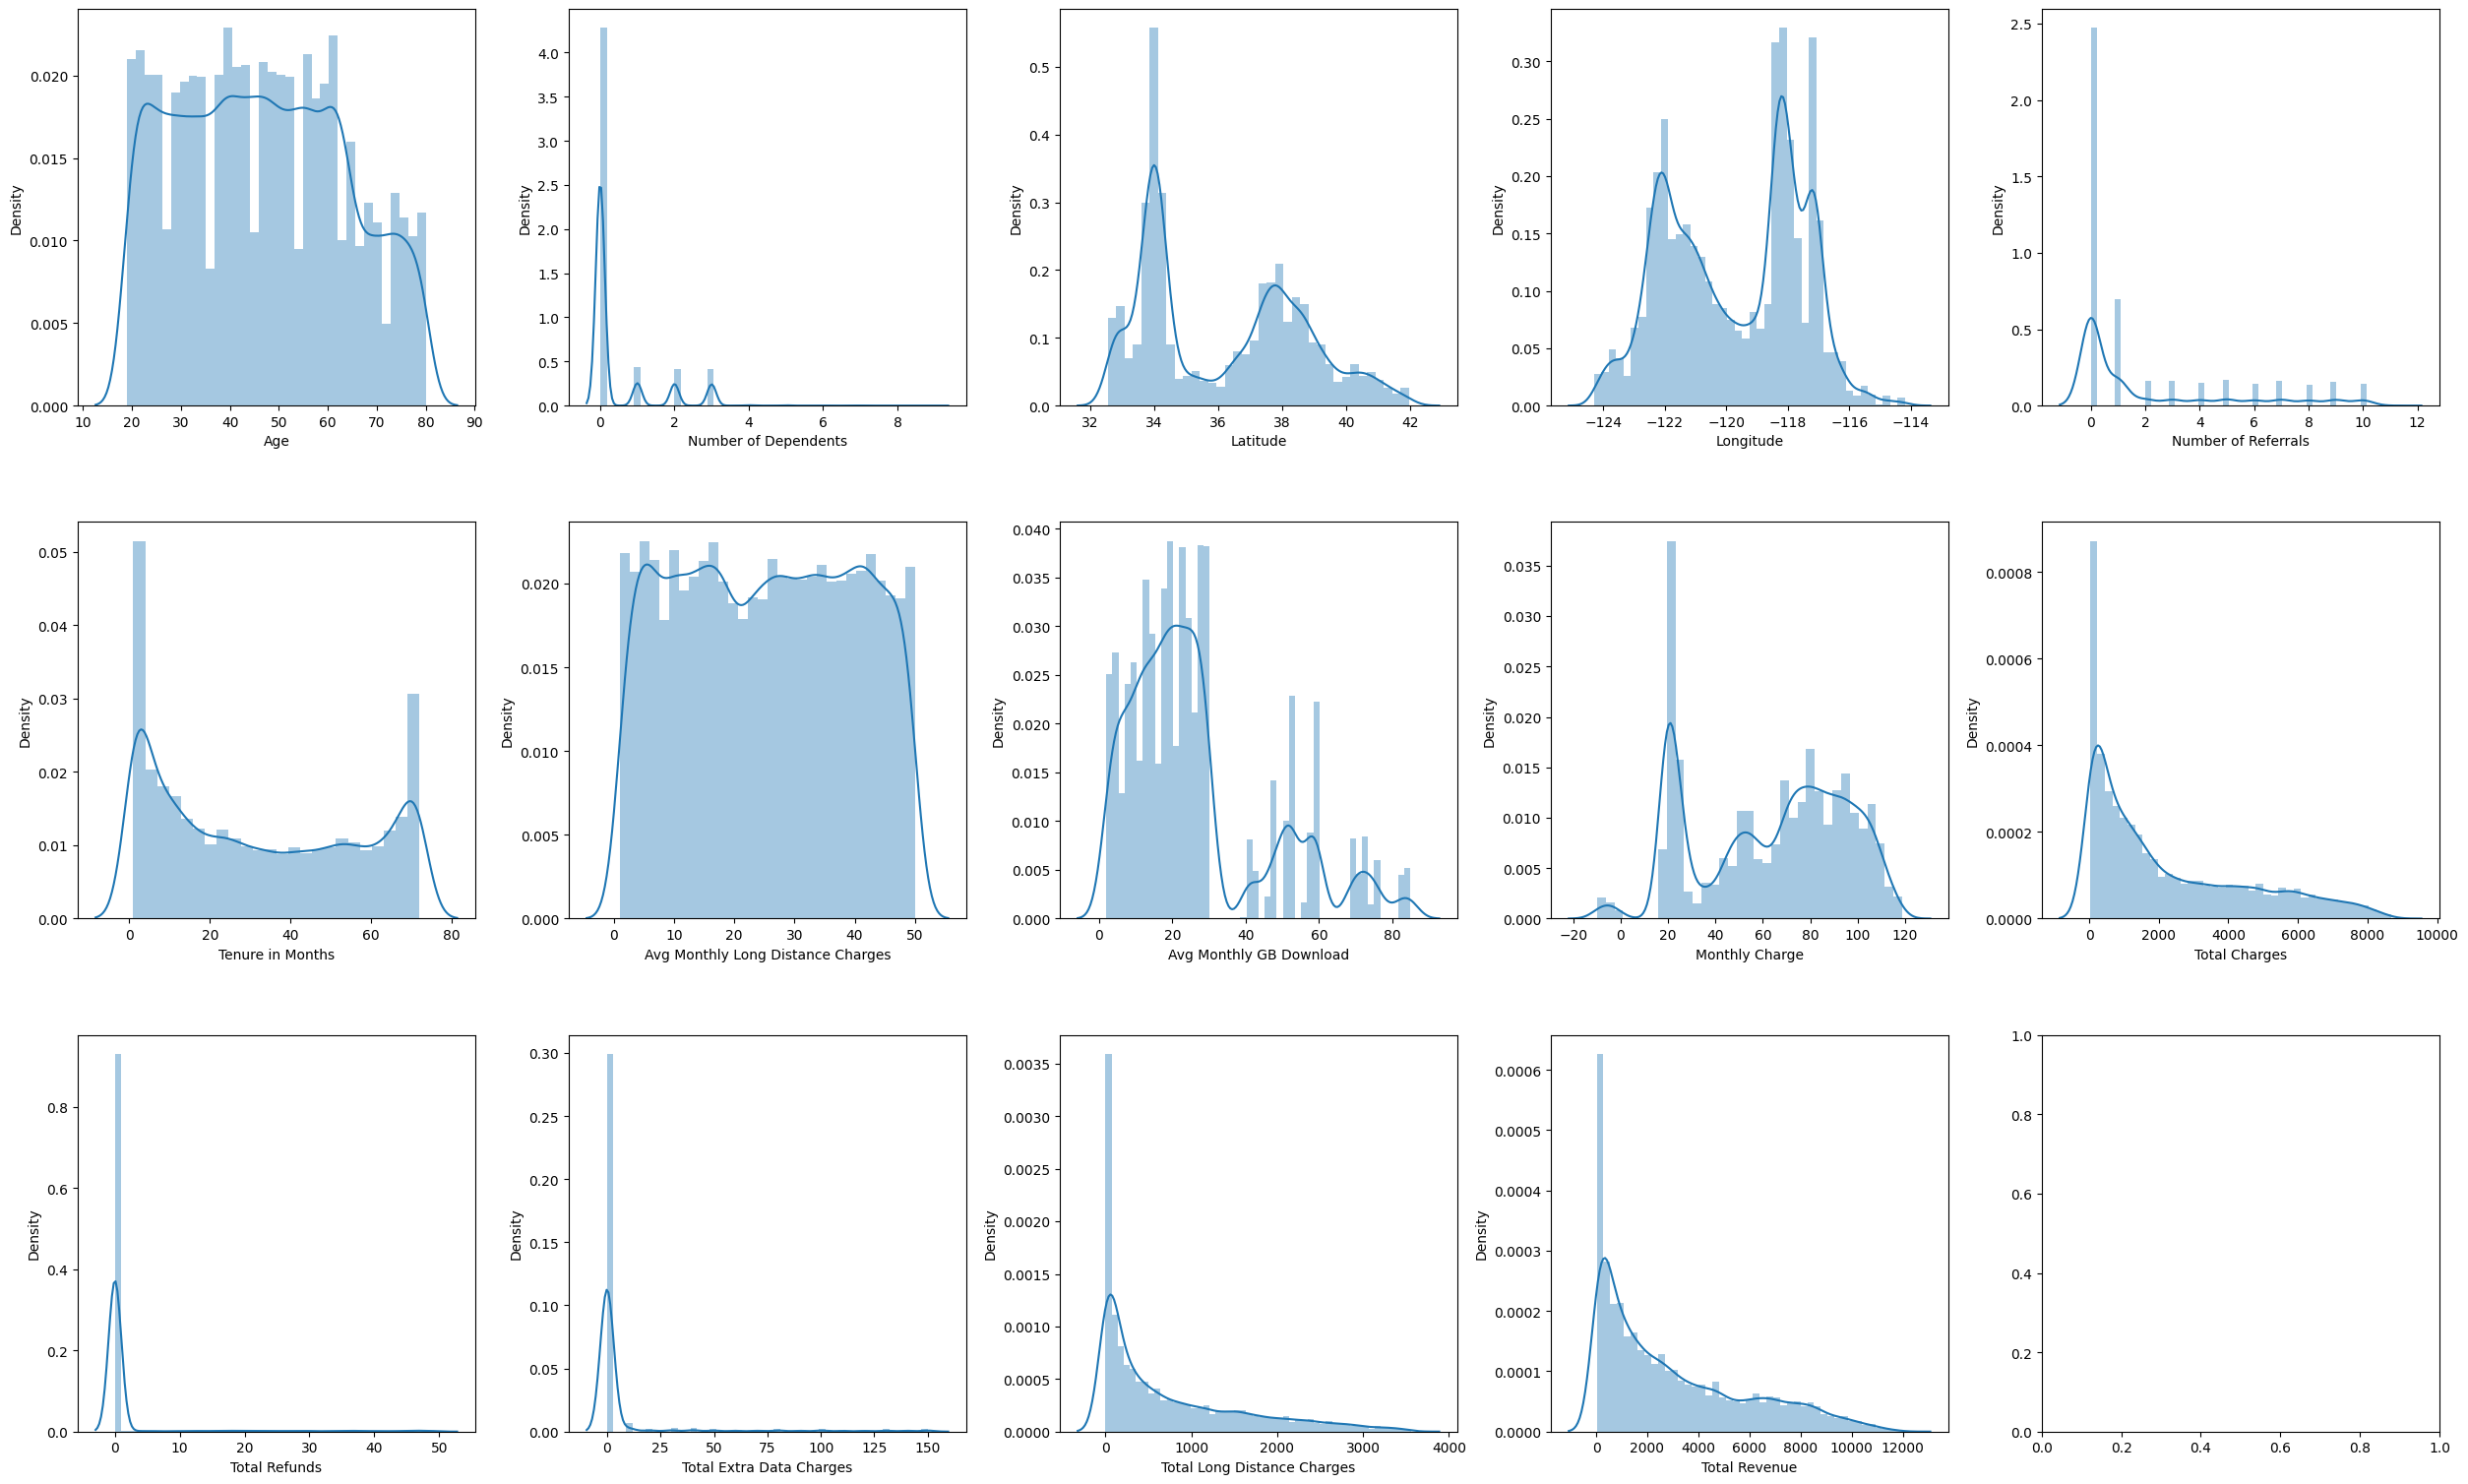

In [27]:
# visualization: distribution plot
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(25,15))
index = 0
axs = axs.flatten()
for k, v in df2.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

Age                                      Avg Monthly GB Download
Number of Dependents                     Avg Monthly GB Download
Latitude                                               Longitude
Longitude                                               Latitude
Number of Referrals                             Tenure in Months
Tenure in Months                                   Total Revenue
Avg Monthly Long Distance Charges    Total Long Distance Charges
Avg Monthly GB Download                                      Age
Monthly Charge                                     Total Charges
Total Charges                                      Total Revenue
Total Refunds                                   Tenure in Months
Total Extra Data Charges                           Total Revenue
Total Long Distance Charges                        Total Revenue
Total Revenue                                      Total Charges
dtype: object

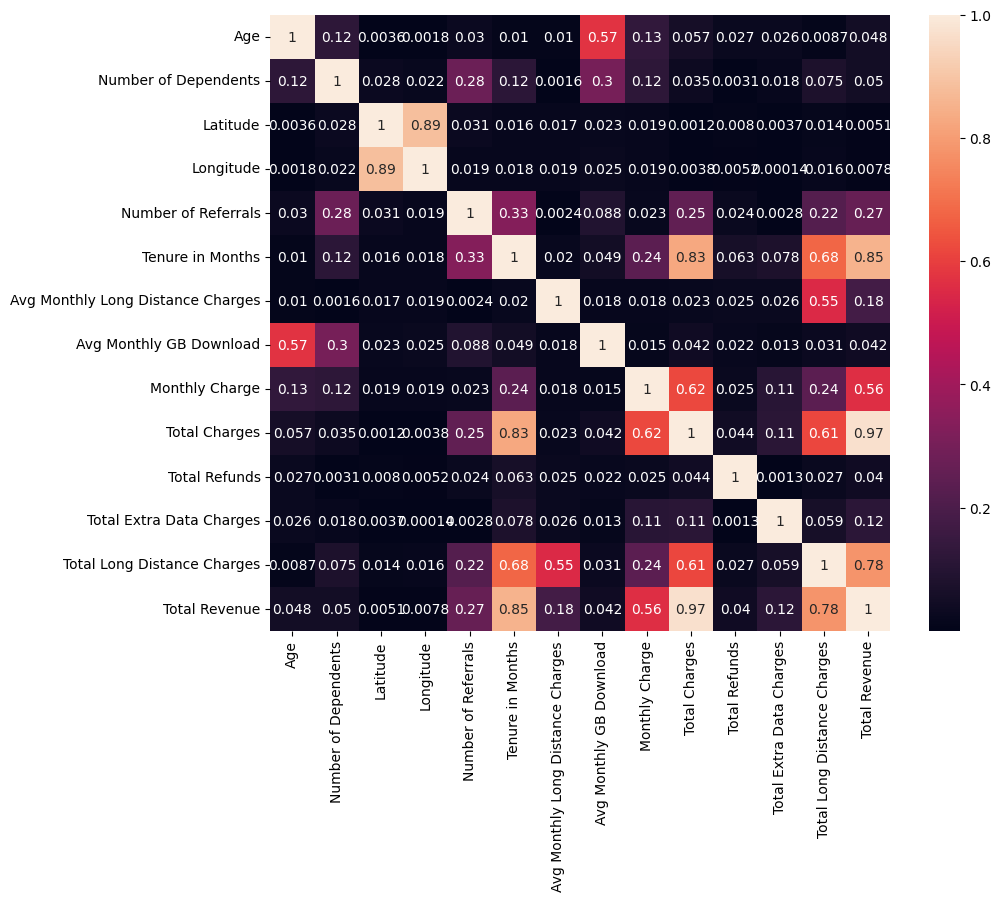

In [28]:
#heat map
corr_mat = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.abs(), annot=True)

for x in range(len(df2.columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

In [29]:
df2 = df2.drop(['Total Revenue'],axis=1)

null values in numerical features:
 Age                                     0
Number of Dependents                    0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges    2902
Avg Monthly GB Download              6433
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
dtype: int64


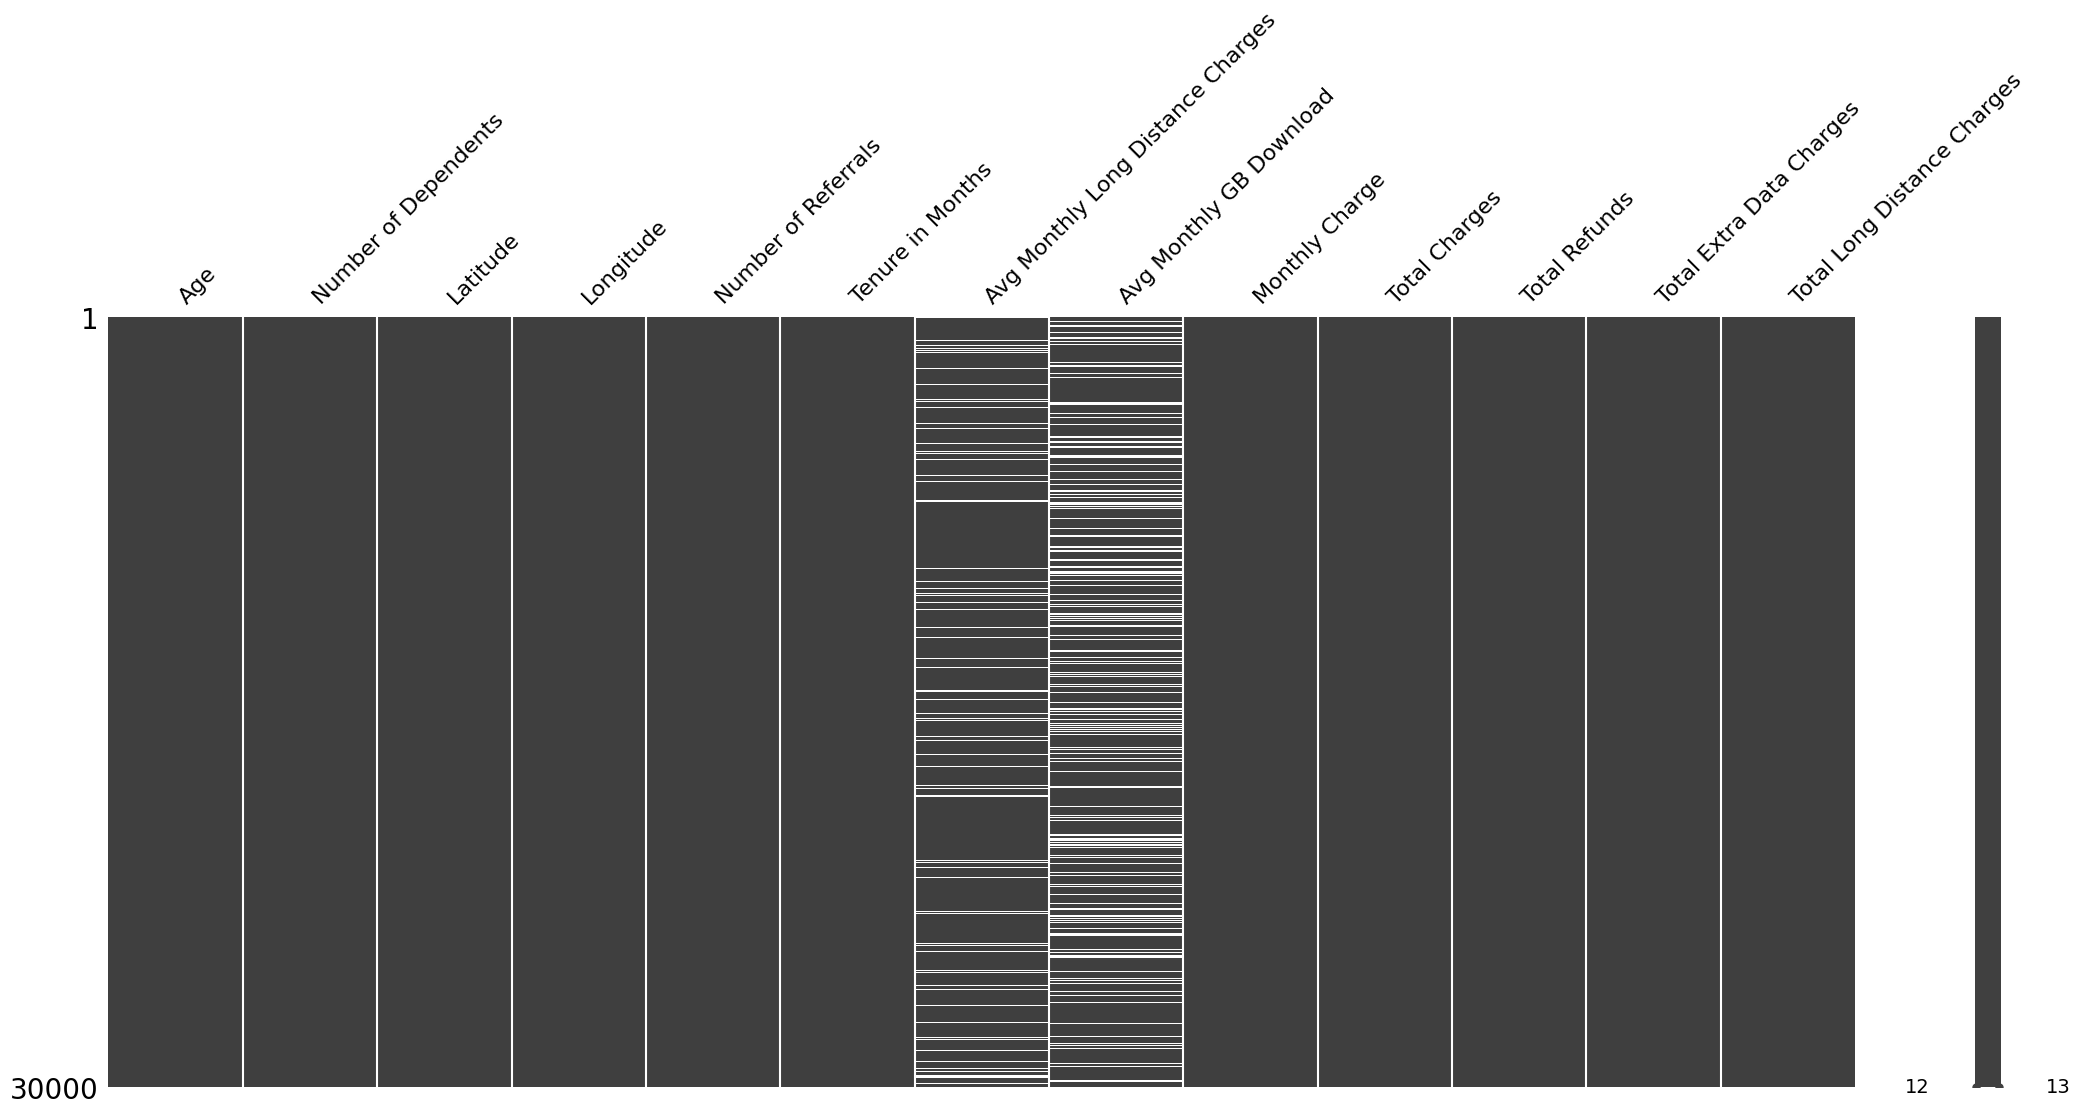

In [30]:
msno.matrix(df2)
print("null values in numerical features:\n",df2.isna().sum())

In [31]:
#filling null values
column_name = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
for column in column_name:
  df2[column] = df2[column].apply(lambda x: 0 if pd.isnull(x) else x)


null values in numerical features:
 Age                                  0
Number of Dependents                 0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
dtype: int64


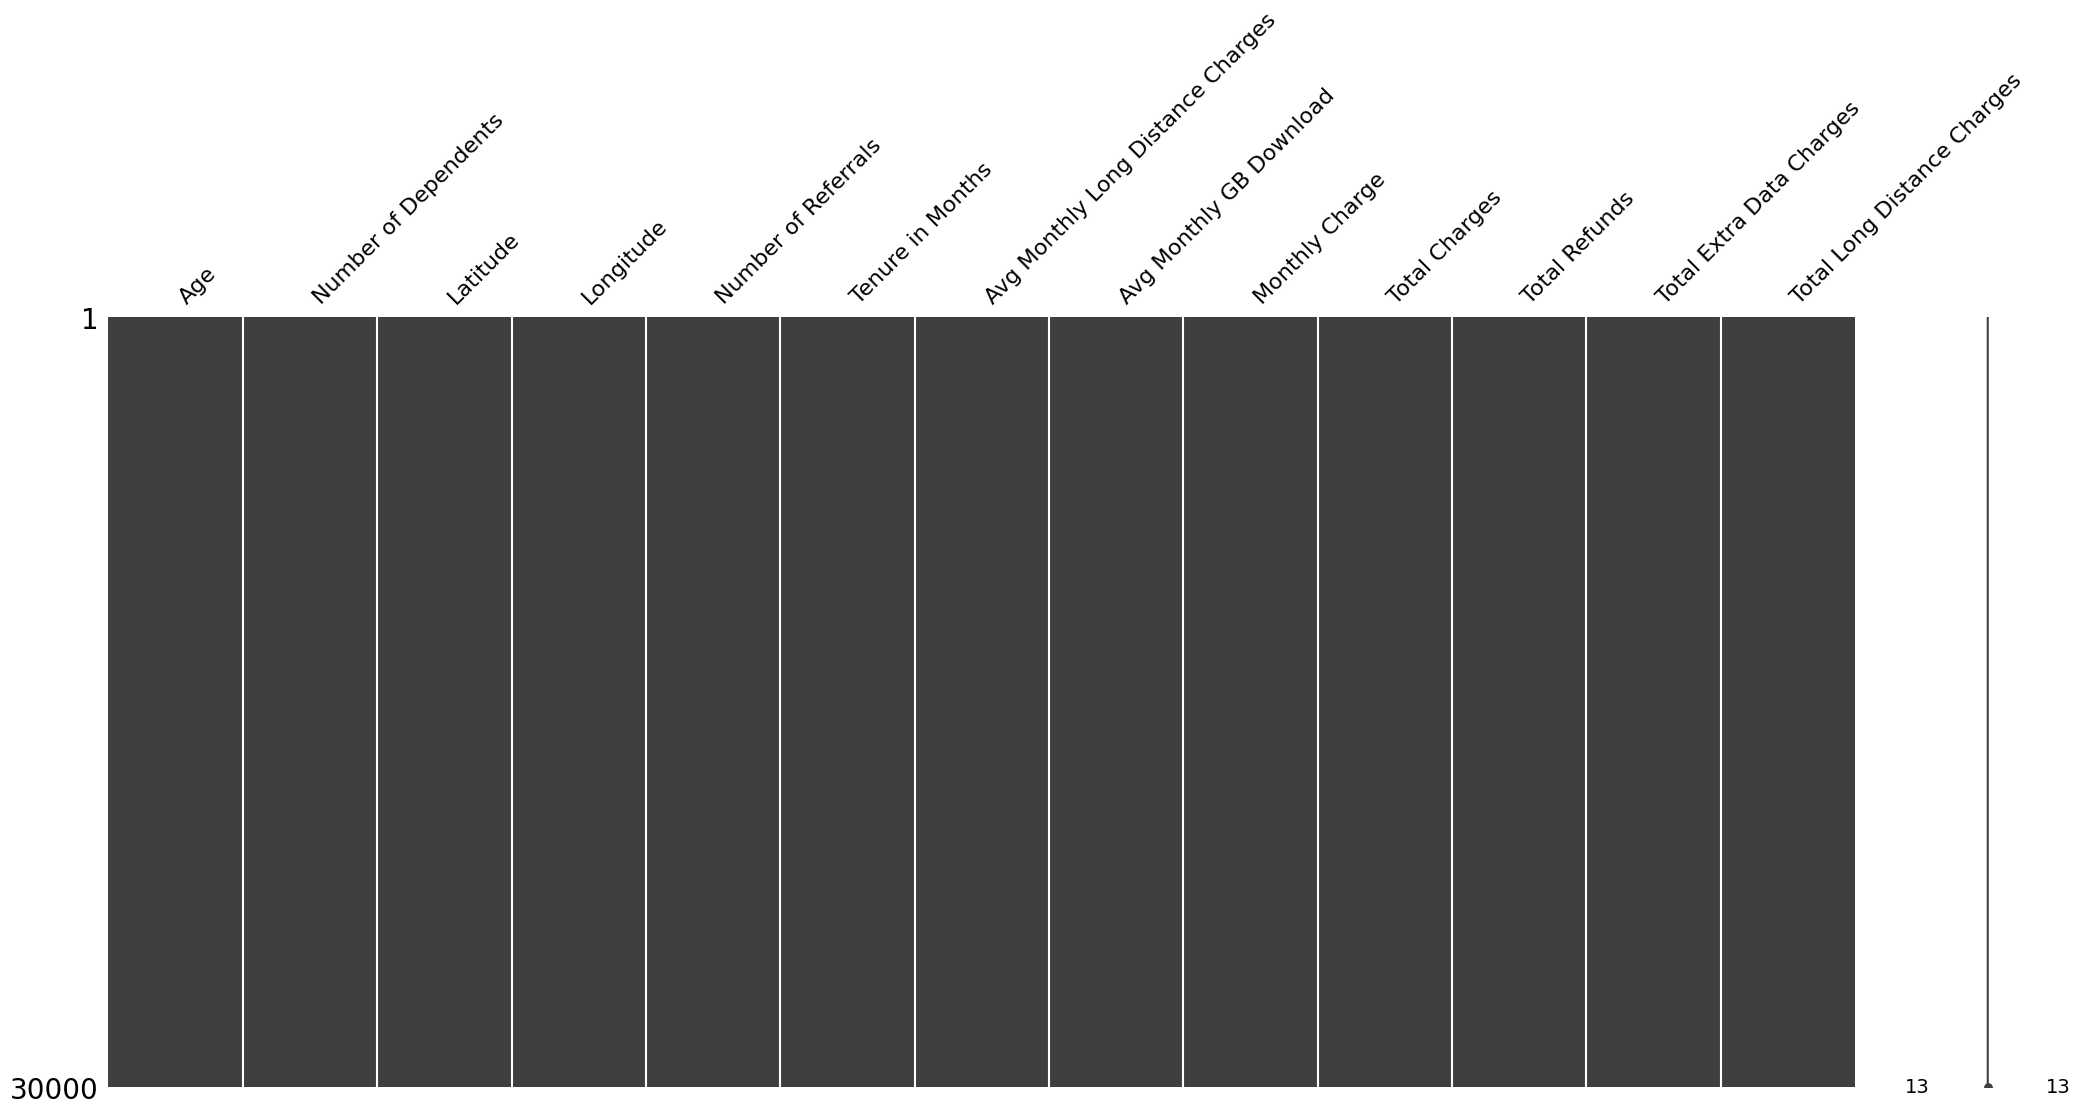

In [32]:
# checking null values
msno.matrix(df2)
print("null values in numerical features:\n",df2.isna().sum())

In [33]:
df = df2.join(df1_imputed)
X = df.drop(['Customer Status'], axis=1)
y = df.loc[:, 'Customer Status'].values


In [34]:
# Split Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Anomaly Detection¶

In [37]:
'''
# First method: Isolation Forests
ifor = IsolationForest(max_features=25, n_estimators=100,
                       random_state=np.random.RandomState(42),
                       contamination=0.05, warm_start=True)
y_train_pred = ifor.fit_predict(X_train_scaled)

# removing outliers(select only the normal data)
mask = y_train_pred != -1
X_train_scaled, y_train = X_train_scaled[mask], y_train[mask]
'''

'\n# First method: Isolation Forests\nifor = IsolationForest(max_features=25, n_estimators=100,\n                       random_state=np.random.RandomState(42),\n                       contamination=0.05, warm_start=True)\ny_train_pred = ifor.fit_predict(X_train_scaled)\n\n# removing outliers(select only the normal data)\nmask = y_train_pred != -1\nX_train_scaled, y_train = X_train_scaled[mask], y_train[mask]\n'

In [38]:
'''
# Second method: Local Outlier Factor
LOF = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_train_pred = LOF.fit_predict(X_train_scaled)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train_scaled, y_train = X_train_scaled[mask], y_train[mask]
'''

'\n# Second method: Local Outlier Factor\nLOF = LocalOutlierFactor(n_neighbors=20, contamination=0.05)\ny_train_pred = LOF.fit_predict(X_train_scaled)\n\n# removing outliers(select only the normal data)\nmask =y_train_pred !=-1\nX_train_scaled, y_train = X_train_scaled[mask], y_train[mask]\n'

In [39]:
'''
# third method: Elliptic
EE = EllipticEnvelope(contamination=0.05, random_state=42)
y_train_pred = EE.fit_predict(X_train_scaled)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train_scaled, y_train = X_train_scaled[mask], y_train[mask]
'''

'\n# third method: Elliptic\nEE = EllipticEnvelope(contamination=0.05, random_state=42)\ny_train_pred = EE.fit_predict(X_train_scaled)\n\n# removing outliers(select only the normal data)\nmask =y_train_pred !=-1\nX_train_scaled, y_train = X_train_scaled[mask], y_train[mask]\n'

In [40]:
# fourth method: One Class Support Vector Machine
ocsvm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
y_train_pred = ocsvm.fit_predict(X_train_scaled)

# removing outliers(select only the normal data)
mask =y_train_pred !=-1
X_train_scaled, y_train = X_train_scaled[mask], y_train[mask]

In [41]:
#Model Selection: SVM

In [42]:
# GridSearch to determine the best hyperparameter in the SVM model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

svc = SVC()

# Instantiate the grid search model
grid_search_SVC = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_SVC.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search_SVC.best_params_
best_score = grid_search_SVC.best_score_

print(f"Best parameters in SVC: {best_params}")
print(f"Best cross-validation score in SVC: {best_score}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters in SVC: {'C': 100, 'kernel': 'rbf'}
Best cross-validation score in SVC: 0.9838356637161058


In [43]:
# using best estimator to make predictions on the test set
best_model_SVC = grid_search_SVC.best_estimator_

In [44]:
# training Phase for best hyperparameter
start_tra = perf_counter()
best_model_SVC.fit(X_train_scaled, y_train)
end_tra = perf_counter()

In [45]:
# print classification report and confusion matrix
y_pred = best_model_SVC.predict(X_test_scaled)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))


def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1


accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))
#

Confusion matrix

Predicted   0.0  1.0   2.0
Actual                    
0.0        1556    6    36
1.0           6  387     0
2.0          53    0  3956
accuracy = 0.983 
precision = 0.983 
recall = 0.983 
f1 = 0.983


In [46]:
# Accuracy on Train
train_score_SVC = round(best_model_SVC.score(X_train_scaled, y_train), 2)
print("The Training Accuracy is: ", train_score_SVC)

# Accuracy on Test
test_score_SVC = round(best_model_SVC.score(X_test_scaled, y_test), 2)
print("The Testing Accuracy is: ", test_score_SVC)

#training time
train_time_SVC = round((end_tra-start_tra), 4)
print(f'train phase time: ', train_time_SVC)

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.98
train phase time:  14.4752


In [47]:
# GridSearch to determine the best hyperparameter in the RF model
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
}


rfc = RandomForestClassifier(random_state=42)
grid_search_RF = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


# Fit the grid search to the data
grid_search_RF.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search_RF.best_params_
best_score = grid_search_RF.best_score_
print(f"Best parameters in RF: {best_params}")
print(f"Best cross-validation score in RF: {best_score}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters in RF: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score in RF: 0.9734253102277272


In [48]:
best_model_RF = grid_search_RF.best_estimator_

In [49]:
start_tra = perf_counter()
best_model_RF.fit(X_train_scaled, y_train)
end_tra = perf_counter()

In [50]:
# print classification report and confusion matrix
y_pred = best_model_RF.predict(X_test_scaled)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0.0  1.0   2.0
Actual                    
0.0        1538    4    56
1.0           5  388     0
2.0          14    0  3995
accuracy = 0.987 
precision = 0.987 
recall = 0.987 
f1 = 0.987


In [51]:
# Accuracy on Train
train_score_RF = round(best_model_RF.score(X_train_scaled, y_train), 2)
print("The Training Accuracy is: ", train_score_RF)

# Accuracy on Test
test_score_RF = round(best_model_RF.score(X_test_scaled, y_test), 2)
print("The Testing Accuracy is: ", test_score_RF)

#training time
train_time_RF = round((end_tra-start_tra), 4)
print(f'train phase time: ', train_time_RF)

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.99
train phase time:  2.414


In [52]:
'''Model Training with PCA
Elbow chart for determining best n_component'''

'Model Training with PCA\nElbow chart for determining best n_component'

In [53]:
# PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

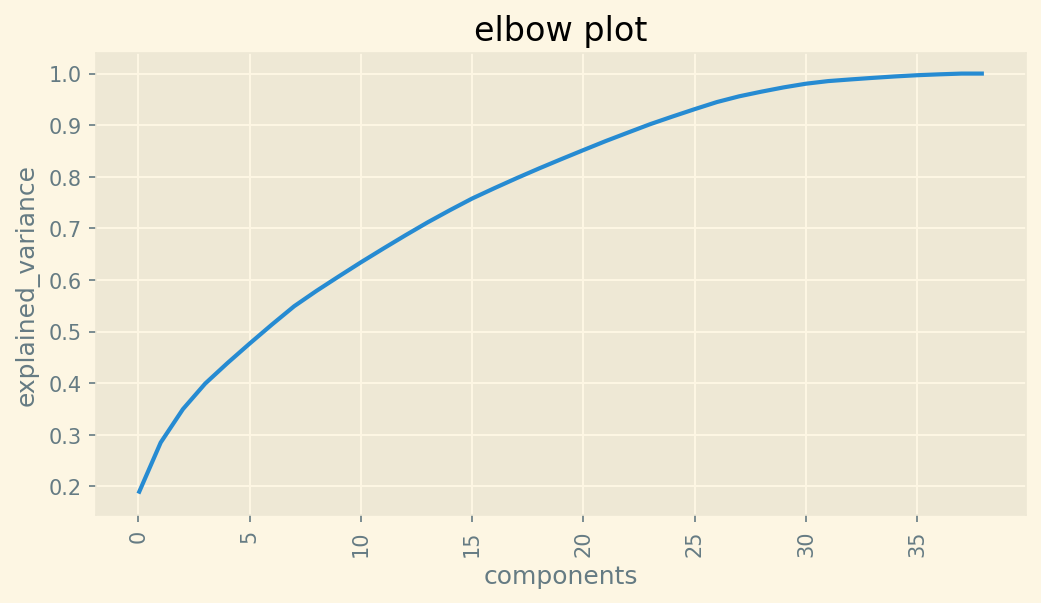

In [54]:
# Determining best n_component for PCA
PC_list = ['PC'+str(i+1) for i in range(39)]

#plotting setup
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 150
plt.style.use('Solarize_Light2')

plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=90)

In [55]:
total_var = np.cumsum(pca.explained_variance_ratio_*100)

for i in range(38):
  print('PC{:2d}, explained_variance: {:0.2f}'.format(i+1, total_var[i]))

PC 1, explained_variance: 18.60
PC 2, explained_variance: 28.49
PC 3, explained_variance: 34.97
PC 4, explained_variance: 39.92
PC 5, explained_variance: 43.89
PC 6, explained_variance: 47.68
PC 7, explained_variance: 51.36
PC 8, explained_variance: 54.91
PC 9, explained_variance: 57.88
PC10, explained_variance: 60.68
PC11, explained_variance: 63.43
PC12, explained_variance: 66.07
PC13, explained_variance: 68.66
PC14, explained_variance: 71.17
PC15, explained_variance: 73.53
PC16, explained_variance: 75.79
PC17, explained_variance: 77.79
PC18, explained_variance: 79.73
PC19, explained_variance: 81.60
PC20, explained_variance: 83.41
PC21, explained_variance: 85.17
PC22, explained_variance: 86.92
PC23, explained_variance: 88.56
PC24, explained_variance: 90.19
PC25, explained_variance: 91.67
PC26, explained_variance: 93.11
PC27, explained_variance: 94.48
PC28, explained_variance: 95.59
PC29, explained_variance: 96.50
PC30, explained_variance: 97.33
PC31, explained_variance: 98.04
PC32, ex

In [56]:
# PCA by n_components=28
pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [57]:
# GridSearch to determine the best hyperparameter in the SVM model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

svc = SVC()

# Instantiate the grid search model
grid_search_SVC_PCA = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_SVC_PCA.fit(X_train_pca, y_train)

# Get the best parameters and the best score
best_params = grid_search_SVC_PCA.best_params_
best_score = grid_search_SVC_PCA.best_score_

print(f"Best parameters in SVC: {best_params}")
print(f"Best cross-validation score in SVC: {best_score}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters in SVC: {'C': 100, 'kernel': 'rbf'}
Best cross-validation score in SVC: 0.9602039165709559


In [58]:
best_model_SVC_PCA = grid_search_SVC_PCA.best_estimator_

In [59]:
# training phase for best hyperparameter
start_tra = perf_counter()
best_model_SVC_PCA.fit(X_train_pca, y_train)
end_tra = perf_counter()

In [60]:
# print classification report and confusion matrix
y_pred = best_model_SVC_PCA.predict(X_test_pca)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


Confusion matrix

Predicted   0.0  1.0   2.0
Actual                    
0.0        1504   22    72
1.0          15  372     6
2.0         116   12  3881
accuracy = 0.960 
precision = 0.960 
recall = 0.960 
f1 = 0.960


In [61]:
# Accuracy on Train
train_score_SVC_PCA = round(best_model_SVC_PCA.score(X_train_pca, y_train), 2)
print("The Training Accuracy is: ", train_score_SVC_PCA)

# Accuracy on Test
test_score_SVC_PCA = round(best_model_SVC_PCA.score(X_test_pca, y_test), 2)
print("The Testing Accuracy is: ", test_score_SVC_PCA)

#training time
train_time_SVC_PCA = round((end_tra-start_tra), 4)
print(f'train phase time: ', train_time_SVC_PCA)


The Training Accuracy is:  0.98
The Testing Accuracy is:  0.96
train phase time:  18.7827


In [62]:
# GridSearch to determine the best hyperparameter in the RF model
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


rfc = RandomForestClassifier(random_state=42)
grid_search_RF_PCA = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


# Fit the grid search to the data
grid_search_RF_PCA.fit(X_train_pca, y_train)

# Get the best parameters and the best score
best_params = grid_search_RF_PCA.best_params_
best_score = grid_search_RF_PCA.best_score_

print(f"Best parameters in RF: {best_params}")
print(f"Best cross-validation score in RF: {best_score}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters in RF: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score in RF: 0.9766757618068435


In [63]:
best_model_RF_PCA = grid_search_RF_PCA.best_estimator_

In [64]:
start_tra = perf_counter()
best_model_RF_PCA.fit(X_train_pca, y_train)
end_tra = perf_counter()

In [65]:
# print classification report and confusion matrix
y_pred = best_model_RF_PCA.predict(X_test_pca)

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0.0  1.0   2.0
Actual                    
0.0        1555    3    40
1.0           2  383     8
2.0          18    3  3988
accuracy = 0.988 
precision = 0.988 
recall = 0.988 
f1 = 0.988


In [66]:
# Accuracy on Train
train_score_RF_PCA = round(best_model_RF_PCA.score(X_train_pca, y_train), 2)
print("The Training Accuracy is: ", train_score_RF_PCA)

# Accuracy on Test
test_score_RF_PCA = round(best_model_RF_PCA.score(X_test_pca, y_test), 2)
print("The Testing Accuracy is: ", test_score_RF_PCA)

#training time
train_time_RF_PCA = round((end_tra-start_tra), 4)
print(f'train phase time: ', train_time_RF_PCA)

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.99
train phase time:  5.9268


In [67]:
Conclusion = pd.DataFrame({'Models':['SVM', 'RF', 'SVM + PCA', 'RF + PCA'],
                          'train acc'               :[train_score_SVC,train_score_RF, train_score_SVC_PCA, train_score_RF_PCA],
                          'test acc'                :[test_score_SVC, test_score_RF,  test_score_SVC_PCA,  test_score_RF_PCA],
                          'training time'           :[train_time_SVC, train_time_RF,  train_time_SVC_PCA,  train_time_RF_PCA]})

Conclusion

,Models,train acc,test acc,training time
0,SVM,1.00,0.98,14.4752
1,RF,1.00,0.99,2.4140
2,SVM + PCA,0.98,0.96,18.7827
3,RF + PCA,1.00,0.99,5.9268
